<h1 style="color: #FF8C00;">Portfolio Analysis: Python Challenge</h1>

---

**This challenge** represents a practical tech assignment designed to test your skills in portfolio analysis. Portfolio analysis is a systematic way to evaluate investment portfolios to optimize asset allocation and management. It involves a variety of financial metrics and visualizations to assess the performance and risk of different financial assets.

- In this exercise, you will be required to perform a series of calculations and create visualizations to analyze a set of financial assets.
- Your task is to develop the necessary code to accomplish each of these tasks effectively.
- This challenge is an opportunity to demonstrate your ability to apply Python programming skills in a real-world financial context.

<h1 style="color: #FF8C00;">Libraries</h1>

<h3 style="color: #FF6347;">-- Insert your code here --</h3>

---

Make sure to import all the libraries you will need to complete your tasks in this challenge.

In [1]:
# Standard libraries
import pandas as pd

# Enable auto-reload for module reloading during development
%load_ext autoreload
%autoreload 2

# Set display options for Pandas to show all columns
pd.set_option('display.max_columns', None)

# Load custom scripts
import scp.data_check as ch
import scp.data_cleaning as dc
import scp.visualization as viz


<h1 style="color: #FF8C00;">Exercise 1: Data Loading and Price Charting</h1>

---

You are tasked with loading and analyzing financial data, which is foundational for effective portfolio management. Begin by loading the file named `asset_price_data.csv`, containing essential pricing information for various financial assets.

Post data loading, your objective is to visualize this data through a time series graph.The integrity of your analysis depends heavily on your ability to visualize trends accurately while ensuring all asset price series begin at a uniform value.

<h3 style="color: #FF6347;">Data Loading</h3>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [2]:
# Load dataset
assets = pd.read_csv('asset_price_data.csv')

In [3]:
# First look at the first few rows of the dataset
assets.head()

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,231.5061,55.875,25.649222,302.93,50.89
1,2019-01-03,231.0356,54.977,25.503047,302.11,50.41
2,2019-01-04,230.4026,56.129,26.147133,301.77,51.38
3,2019-01-07,230.0543,56.838,25.955277,302.33,52.14
4,2019-01-08,229.7012,56.895,26.137997,303.42,52.13


In [4]:
# Check data types, number of missing values, duplicates, and unique values
ch.check(assets)

Number of columns: 6 and rows: 783

Data types:
date       object
Asset1    float64
Asset2    float64
Asset3    float64
Asset4    float64
Asset5    float64
dtype: object

Unique values count:
date      783
Asset1    768
Asset2    766
Asset3    735
Asset4    646
Asset5    651
dtype: int64

These columns appear to be categorical (less than 20 unique values):
Index([], dtype='object')

Unique value count for categorical columns:

Count of null values:
date       0
Asset1    13
Asset2    13
Asset3    13
Asset4    49
Asset5    20
dtype: int64

Count of duplicated values:
0


In [5]:
# Formatting column names using snake case
assets_clean = dc.snake(assets)

# Convert 'date' column to datetime format
assets_clean = dc.convert_to_datetime(assets_clean, 'date')

# Remove Rows with NaN values
assets_clean = dc.remove_nan_rows(assets_clean)


In [6]:
# A look at the first few rows of the cleaned dataset
assets_clean.head()

,date,asset1,asset2,asset3,asset4,asset5
0,2019-01-02,231.5061,55.875,25.649222,302.93,50.89
1,2019-01-03,231.0356,54.977,25.503047,302.11,50.41
2,2019-01-04,230.4026,56.129,26.147133,301.77,51.38
3,2019-01-07,230.0543,56.838,25.955277,302.33,52.14
4,2019-01-08,229.7012,56.895,26.137997,303.42,52.13


In [7]:
# Re-checking the data types of the cleaned DataFrame
ch.check(assets_clean)

Number of columns: 6 and rows: 730

Data types:
date      datetime64[ns]
asset1           float64
asset2           float64
asset3           float64
asset4           float64
asset5           float64
dtype: object

Unique values count:
date      730
asset1    728
asset2    726
asset3    699
asset4    643
asset5    627
dtype: int64

These columns appear to be categorical (less than 20 unique values):
Index([], dtype='object')

Unique value count for categorical columns:

Count of null values:
date      0
asset1    0
asset2    0
asset3    0
asset4    0
asset5    0
dtype: int64

Count of duplicated values:
0


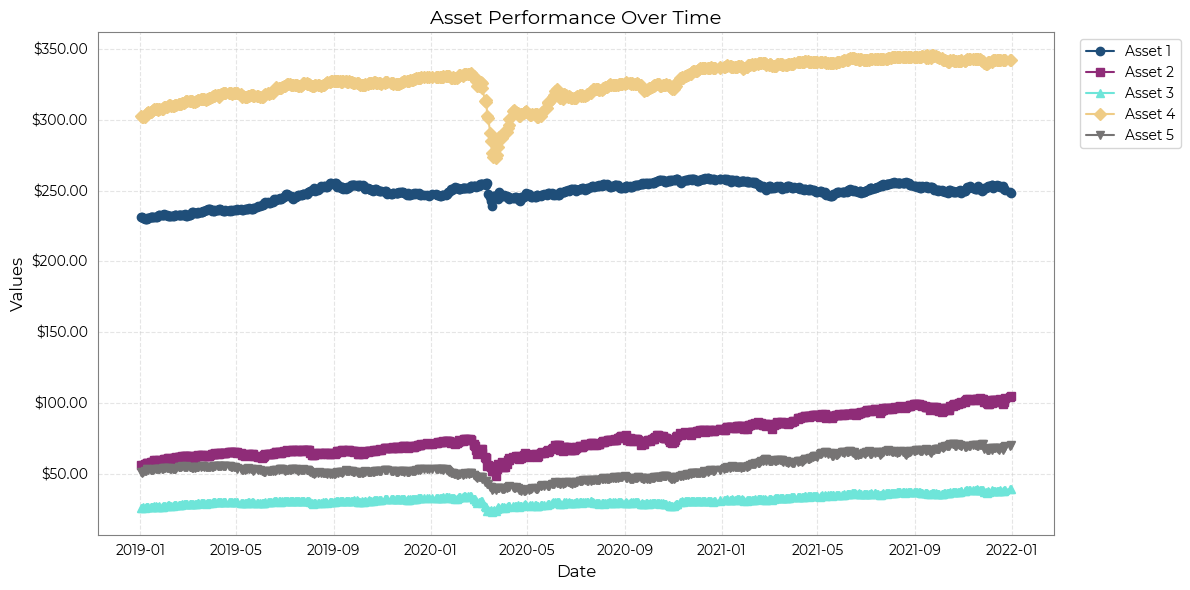

In [8]:
# Time series graph
viz.assets_trends(assets_clean)


<h1 style="color: #FF8C00;">Exercise 2: Daily Percentage Returns</h1>

---

You are required to calculate the daily percentage returns for each financial asset. Utilize this data to accomplish the following:
- Calculate the correlation matrix for the five assets.
- Create a scatter plot comparing the returns of two specific assets.

<h2 style="color: #FF6347;">Daily Returns Calculation.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [9]:
# Daily percentage returns
assets_porc = viz.daily_return(assets_clean)
assets_porc


,asset1_daily_return,asset2_daily_return,asset3_daily_return,asset4_daily_return,asset5_daily_return
0,NaN,NaN,NaN,NaN,NaN
1,-0.203234,-1.607159,-0.569902,-0.270690,-0.943211
2,-0.273984,2.095422,2.525524,-0.112542,1.924221
3,-0.151170,1.263162,-0.733753,0.185572,1.479175
4,-0.153486,0.100285,0.703977,0.360533,-0.019179
...,...,...,...,...,...
774,-0.607816,1.471034,1.497326,0.002923,1.996997
775,-0.114479,1.750610,0.763962,0.023383,1.295451
776,-0.396077,0.982159,0.967320,0.049677,0.537713
780,-0.558495,1.197576,0.608493,0.023366,0.910668


<h2 style="color: #FF6347;">Correlation Matrix Calculation.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

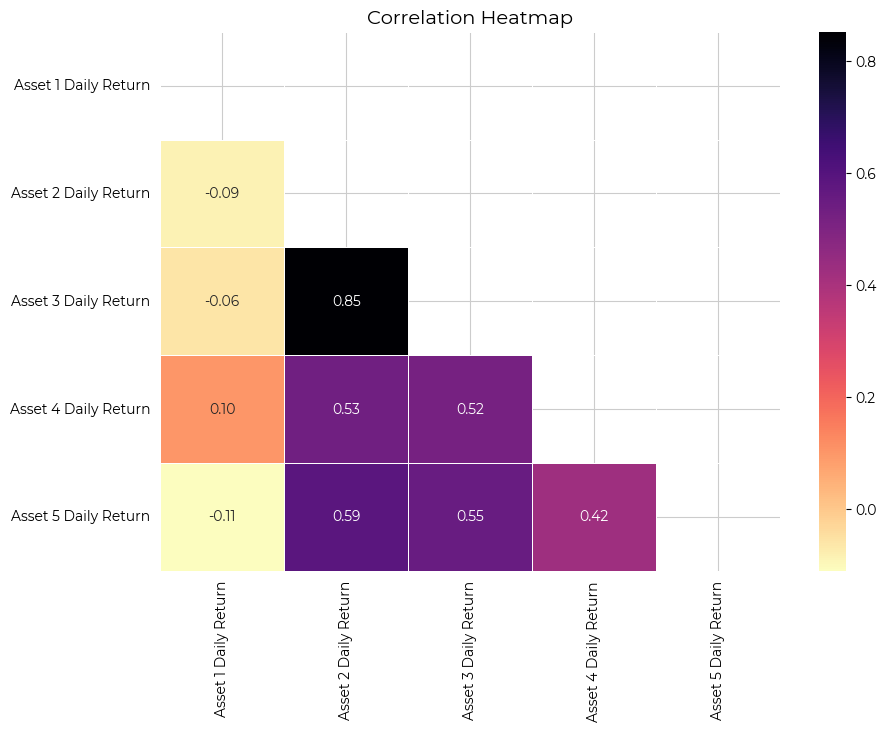

In [10]:
viz.plot_correlation_heatmap(assets_porc)

<h2 style="color: #FF6347;">Scatter Plot between the Returns of Two Assets.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

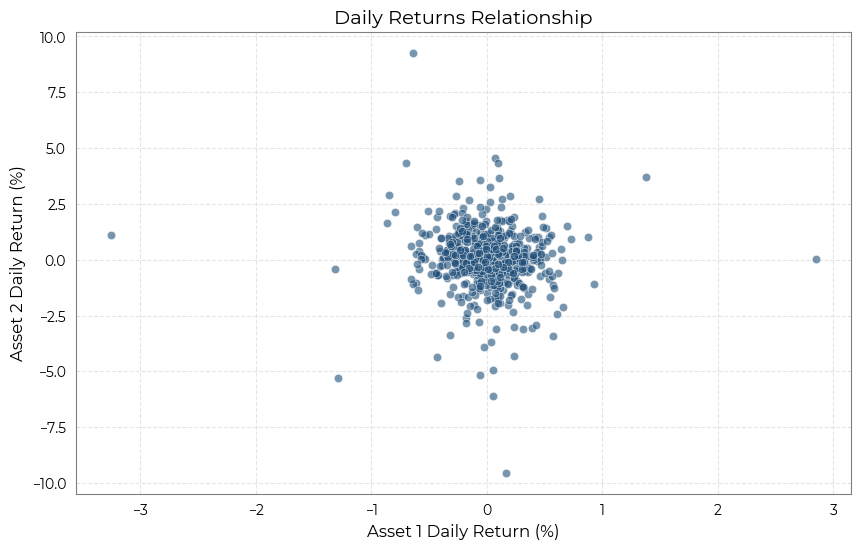

In [11]:
viz.plot_scatter_plot(assets_porc, "asset1_daily_return", "asset2_daily_return")

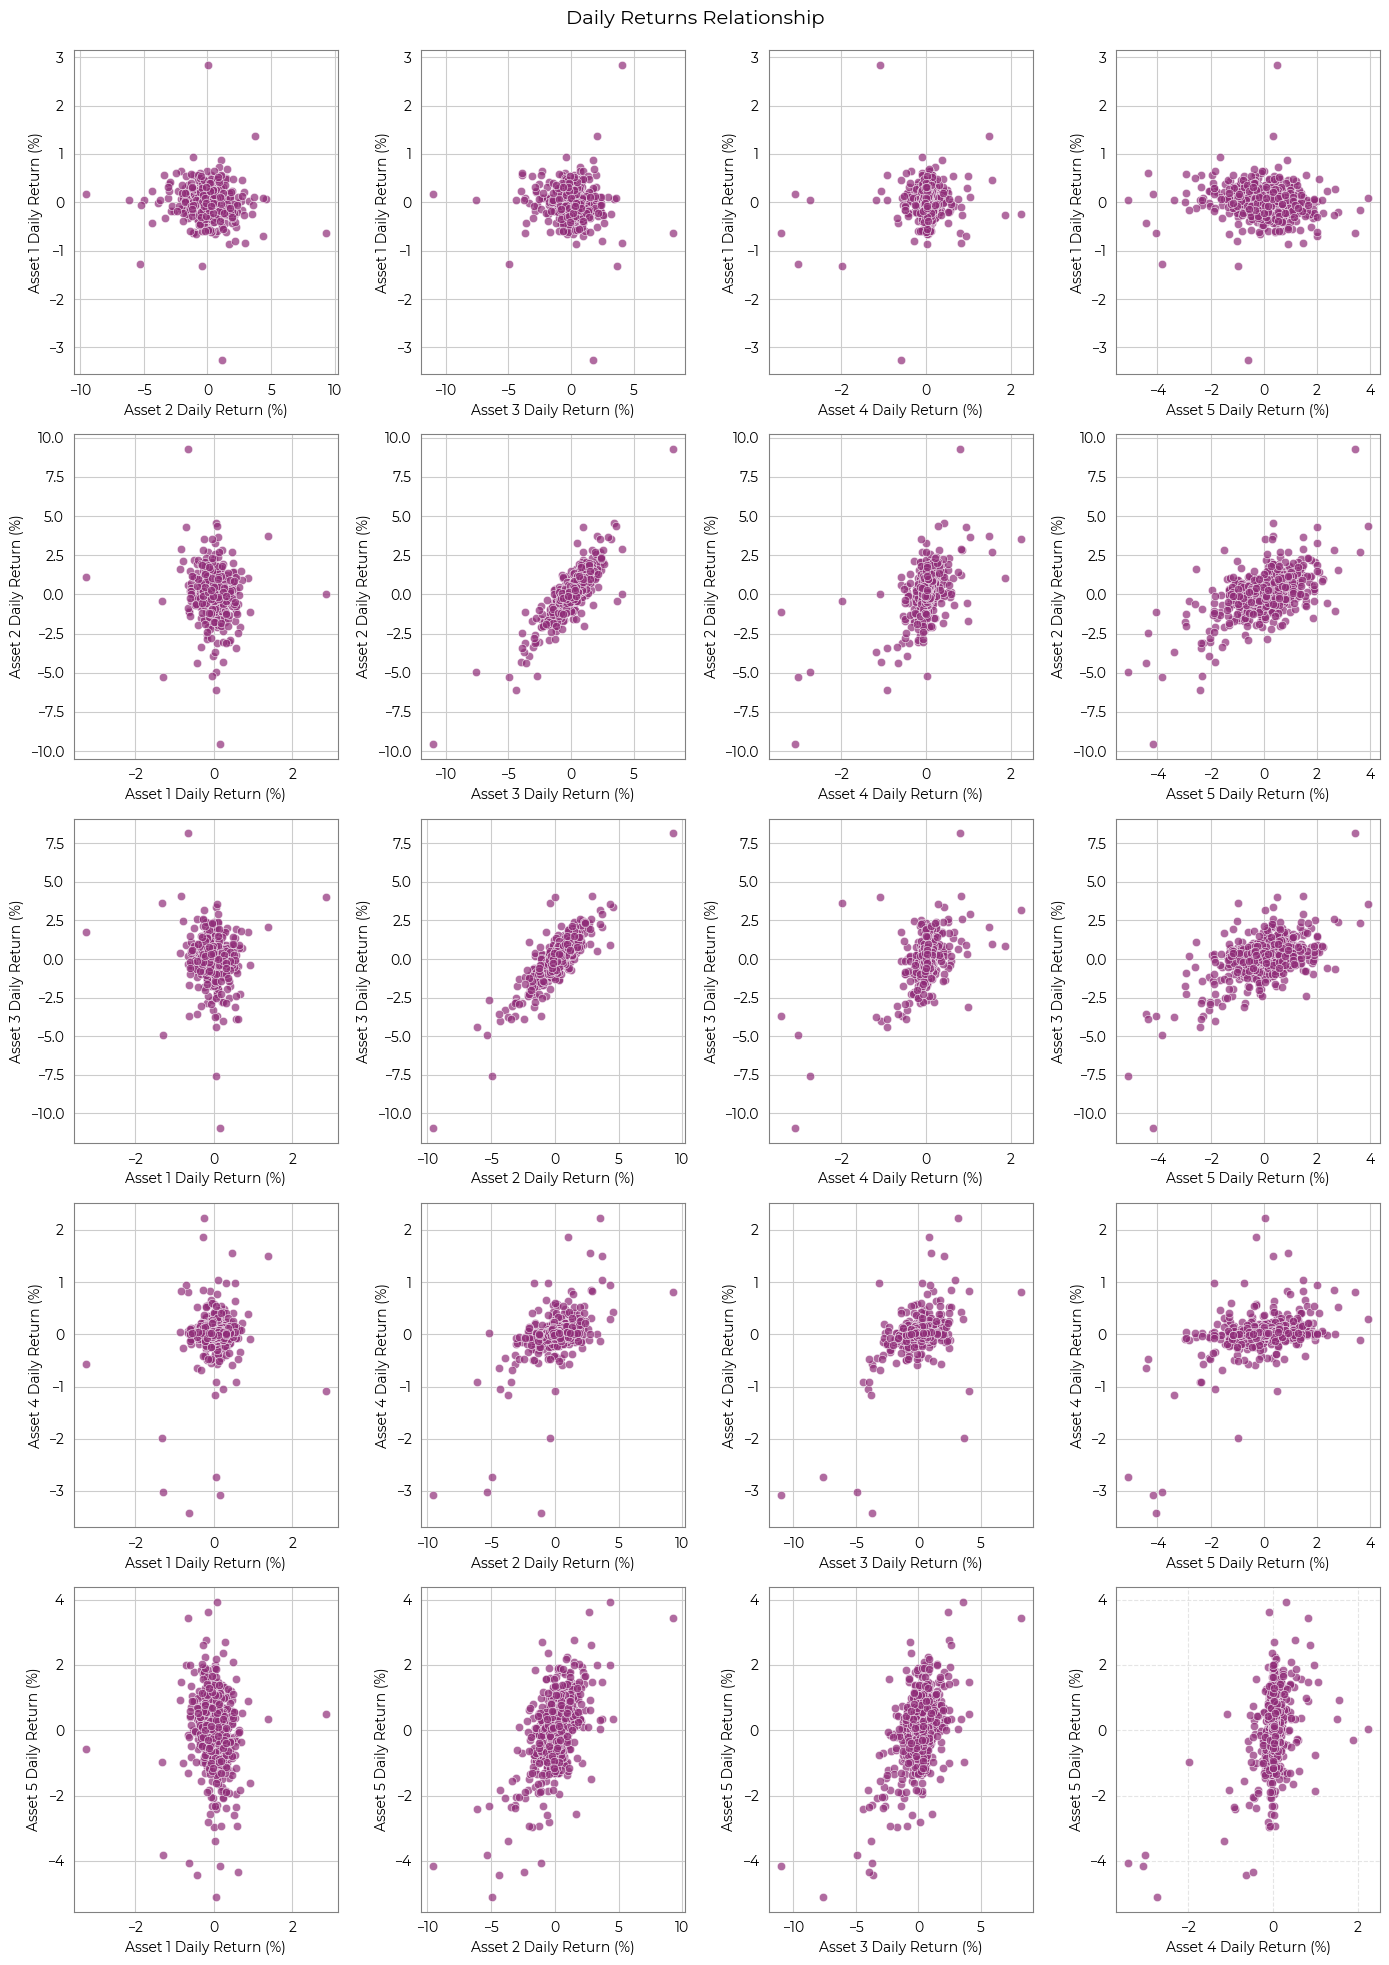

In [12]:
viz.plot_scatter_plot_all(assets_porc)

<h1 style="color: #FF8C00;">Exercise 3: Portfolio Analysis</h1>

---

This third exercise focuses on calculating and analyzing the performance of a portfolio. Begin by loading the file named `portfolio_weights.csv`, which contains the daily weights of each asset in the portfolio.

To complete the exercise, you will need to perform the following tasks:
- Create an area chart of the asset weights.
- Plot the historical cumulative returns of the portfolio.
- Calculate the annualized return of the portfolio.
- Determine the annualized volatility of the portfolio (using an annualization factor of 261 days).
- Produce an area chart grouping asset weights by their categories, as detailed in the `asset_information_data.csv`.

<h2 style="color: #FF6347;">Area Chart of Asset Weights.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [13]:
# Load dataset
assets_w = pd.read_csv('portfolio_weights.csv')

In [14]:
# First look at the first few rows of the dataset
assets_w.head()

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974
1,2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974
2,2019-01-04,0.225458,0.116255,0.265003,0.23031,0.162974
3,2019-01-07,0.225458,0.116255,0.265003,0.23031,0.162974
4,2019-01-08,0.225458,0.116255,0.265003,0.23031,0.162974


In [15]:
# Check data types, number of missing values, duplicates, and unique values
ch.check(assets_w)

Number of columns: 6 and rows: 783

Data types:
date       object
Asset1    float64
Asset2    float64
Asset3    float64
Asset4    float64
Asset5    float64
dtype: object

Unique values count:
date      783
Asset1      3
Asset2      3
Asset3      3
Asset4      3
Asset5      3
dtype: int64

These columns appear to be categorical (less than 20 unique values):
Index(['Asset1', 'Asset2', 'Asset3', 'Asset4', 'Asset5'], dtype='object')

Unique value count for categorical columns:

Asset1:
Asset1
0.321749    262
0.071307    261
0.225458    260
Name: count, dtype: int64

Asset2:
Asset2
0.127529    262
0.266093    261
0.116255    260
Name: count, dtype: int64

Asset3:
Asset3
0.123941    262
0.168775    261
0.265003    260
Name: count, dtype: int64

Asset4:
Asset4
0.185697    262
0.335470    261
0.230310    260
Name: count, dtype: int64

Asset5:
Asset5
0.241084    262
0.158356    261
0.162974    260
Name: count, dtype: int64

Count of null values:
date      0
Asset1    0
Asset2    0
Asset3    0
A

In [16]:
# Formatting column names using snake case
assets_w_clean = dc.snake(assets_w)

# Convert 'date' column to datetime format
assets_w_clean = dc.convert_to_datetime(assets_w_clean, 'date')

In [17]:
# A look at the first few rows of the cleaned dataset
assets_w_clean.head()

,date,asset1,asset2,asset3,asset4,asset5
0,2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974
1,2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974
2,2019-01-04,0.225458,0.116255,0.265003,0.23031,0.162974
3,2019-01-07,0.225458,0.116255,0.265003,0.23031,0.162974
4,2019-01-08,0.225458,0.116255,0.265003,0.23031,0.162974


In [18]:
# Re-checking the data types of the cleaned DataFrame
ch.check(assets_w_clean)

Number of columns: 6 and rows: 783

Data types:
date      datetime64[ns]
asset1           float64
asset2           float64
asset3           float64
asset4           float64
asset5           float64
dtype: object

Unique values count:
date      783
asset1      3
asset2      3
asset3      3
asset4      3
asset5      3
dtype: int64

These columns appear to be categorical (less than 20 unique values):
Index(['asset1', 'asset2', 'asset3', 'asset4', 'asset5'], dtype='object')

Unique value count for categorical columns:

asset1:
asset1
0.321749    262
0.071307    261
0.225458    260
Name: count, dtype: int64

asset2:
asset2
0.127529    262
0.266093    261
0.116255    260
Name: count, dtype: int64

asset3:
asset3
0.123941    262
0.168775    261
0.265003    260
Name: count, dtype: int64

asset4:
asset4
0.185697    262
0.335470    261
0.230310    260
Name: count, dtype: int64

asset5:
asset5
0.241084    262
0.158356    261
0.162974    260
Name: count, dtype: int64

Count of null values:
date   

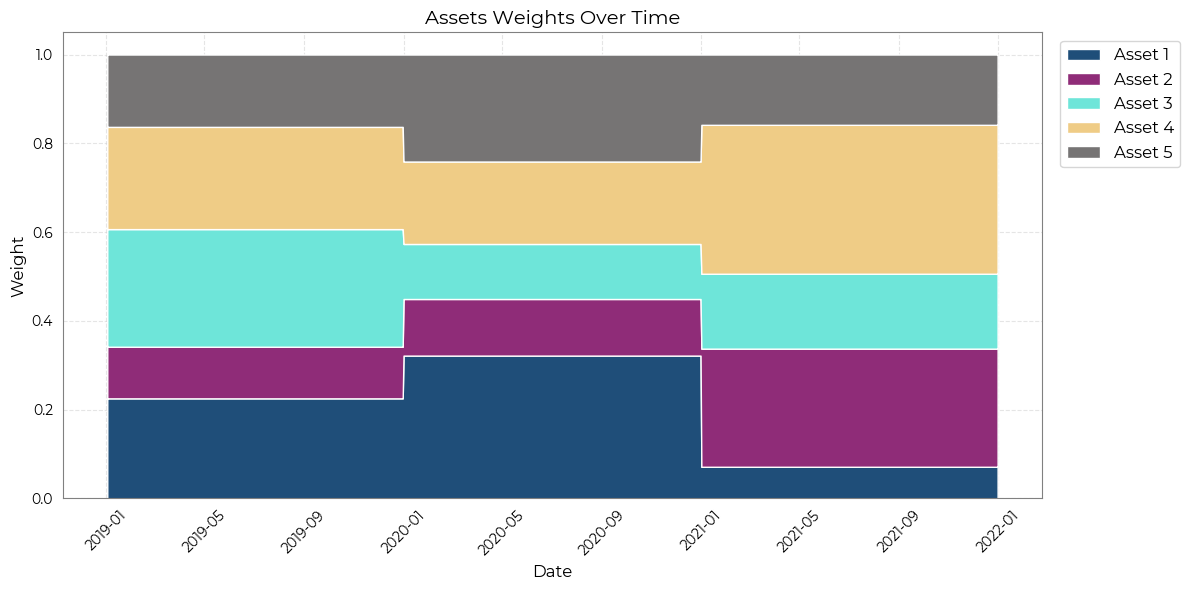

In [19]:
# Area Chart of Asset Weights
viz.plot_area_chart(assets_w_clean)

<h2 style="color: #FF6347;">Chart of Historical Cumulative Returns of the Portfolio.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

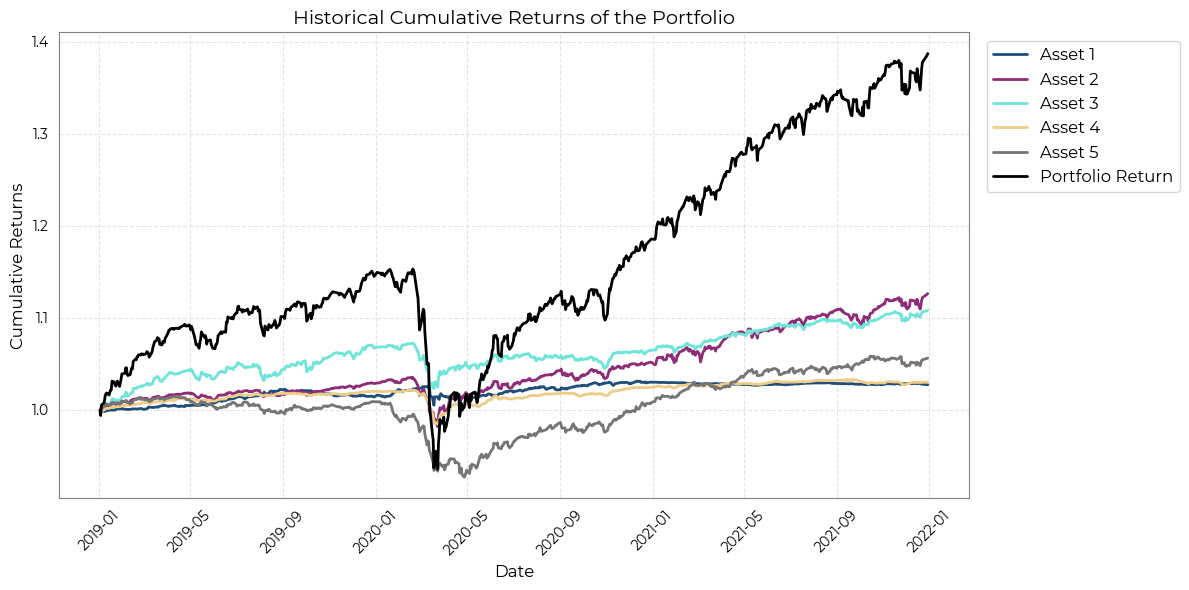

In [20]:
cumulative_returns_p = viz.plot_cumulative_returns(assets, assets_w)

<h2 style="color: #FF6347;">Annualized Return.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [21]:
annualized_return = viz.calculate_annualized_return(cumulative_returns_p)
print("Annualized Return:", round(annualized_return * 100, 2), "%")

Annualized Return: 11.56 %


<h2 style="color: #FF6347;">Annualized Volatility.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [22]:
annualized_volatility = viz.calculate_annualized_volatility(cumulative_returns_p)
print(f"Annualized Portfolio Volatility:", round(annualized_volatility * 100, 2), "%")

Annualized Portfolio Volatility: 14.72 %


<h2 style="color: #FF6347;">Area Chart of Asset Weights Grouped by Family.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [23]:
# Load the asset information
asset_info = pd.read_csv('asset_information_data.csv')

In [24]:
# First look at the first few rows of the dataset
asset_info.head()

,Name,Family
0,Asset1,Fixed Income
1,Asset2,Fixed Income
2,Asset3,Equity
3,Asset4,Equity
4,Asset5,Alternative


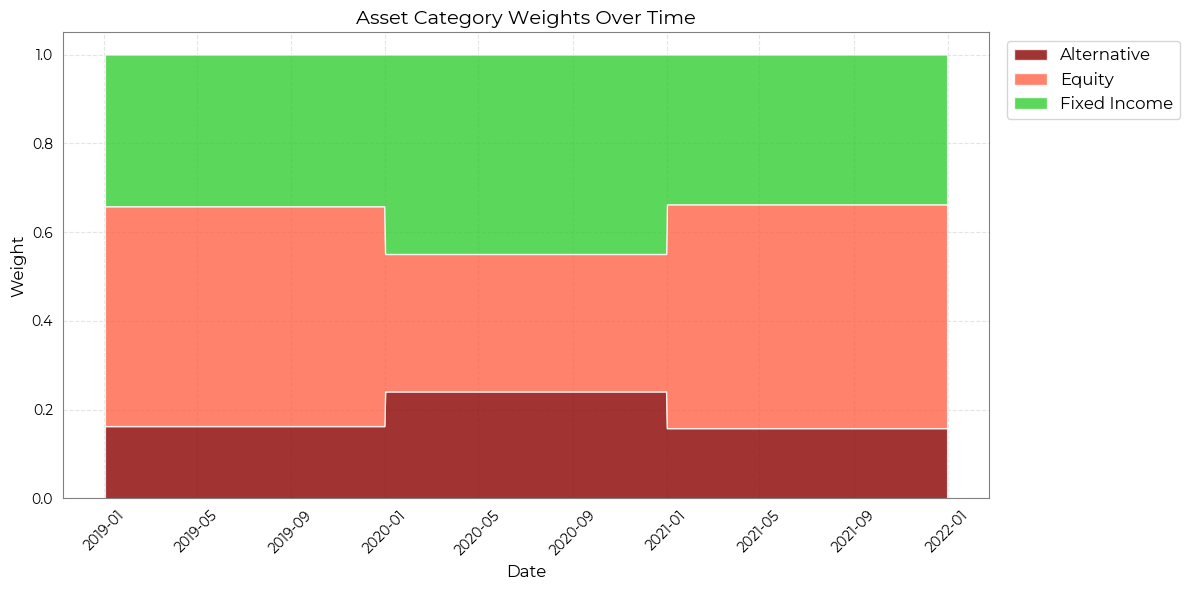

In [25]:
al = viz.plot_category_area_chart(assets_w_clean, asset_info)
al